In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### File Reading

In [3]:
csvFileLocation = 'data/targetfirm_prediction_dataset_small.csv'

In [4]:
finance_dataframe = pd.read_csv(csvFileLocation)

In [5]:
finance_dataframe.head()

,Unnamed: 0,gvkey,fyear,target,at,revt,ib,ca,capx,ceq,che,emp,invt,re,xrd,dltt,dv,sic
0,6,1004,2000.0,0.0,701.854,874.255,18.531,NaN,13.134,340.212,13.809,2.5,320.590,204.065,NaN,179.987,9.157,5080.0
1,7,1004,2001.0,0.0,710.199,638.721,-58.939,NaN,12.112,310.235,34.522,2.2,286.588,139.603,NaN,217.699,4.430,5080.0
2,8,1004,2002.0,0.0,686.621,606.337,-12.410,NaN,9.930,294.988,29.154,2.1,259.954,124.106,NaN,164.658,0.797,5080.0
3,9,1004,2003.0,0.0,709.292,651.958,3.504,NaN,10.286,301.684,41.010,2.3,247.245,131.884,NaN,248.666,0.000,5080.0
4,10,1004,2004.0,0.0,732.230,747.848,18.572,NaN,13.033,314.744,50.338,2.6,255.477,142.450,NaN,227.159,0.000,5080.0


#### Data Cleaning

In [6]:
finance_dataframe.isna().sum()

Unnamed: 0         0
gvkey              0
fyear              0
target             0
at             34635
revt           35677
ib             35660
ca            211399
capx           63184
ceq            35063
che            57076
emp            63859
invt           53353
re             40548
xrd           150287
dltt           35036
dv             65058
sic                3
dtype: int64

In [7]:
# # dropping columns which contains more than 60% NaN values.

# columns = finance_dataframe.columns
# for col in columns:
#     if finance_dataframe[col].isna().sum() >= len(finance_dataframe)*0.6:
#         finance_dataframe.drop(columns=[col], inplace=True)

In [8]:
finance_dataframe.fillna(0,inplace=True)

In [9]:
finance_dataframe.isna().sum()

Unnamed: 0    0
gvkey         0
fyear         0
target        0
at            0
revt          0
ib            0
ca            0
capx          0
ceq           0
che           0
emp           0
invt          0
re            0
xrd           0
dltt          0
dv            0
sic           0
dtype: int64

In [10]:
# for features not using Unnamed: 0, gvkey, fyear and no target
finance_features = finance_dataframe.iloc[:,3:len(finance_dataframe.columns)]
y = finance_features['target']

#### Data Visualization

In [11]:
finance_features.corr()

,target,at,revt,ib,ca,capx,ceq,che,emp,invt,re,xrd,dltt,dv,sic
target,1.000000,0.007956,0.012633,0.009578,-0.001701,-0.000295,0.013463,0.007151,0.004641,0.002051,0.010845,0.000005,0.001124,0.001559,0.018790
at,0.007956,1.000000,0.475869,0.361056,0.197135,0.155549,0.611279,0.606885,0.278413,0.261155,0.443250,0.064187,0.588733,0.308805,0.036945
revt,0.012633,0.475869,1.000000,0.574908,0.048207,0.685839,0.707128,0.308636,0.668437,0.230391,0.664255,0.404001,0.272088,0.557734,-0.020152
ib,0.009578,0.361056,0.574908,1.000000,0.064588,0.433550,0.592323,0.247623,0.348491,0.151357,0.604742,0.284968,0.203847,0.534578,-0.007802
ca,-0.001701,0.197135,0.048207,0.064588,1.000000,-0.002868,0.074508,-0.001430,0.027778,-0.001086,0.066614,-0.002031,0.050753,-0.002540,0.009017
capx,-0.000295,0.155549,0.685839,0.433550,-0.002868,1.000000,0.557142,0.128961,0.432310,0.125157,0.529393,0.340061,0.094468,0.514502,-0.061823
ceq,0.013463,0.611279,0.707128,0.592323,0.074508,0.557142,1.000000,0.439403,0.467133,0.234837,0.823977,0.297994,0.087902,0.463579,0.000085
che,0.007151,0.606885,0.308636,0.247623,-0.001430,0.128961,0.439403,1.000000,0.187329,0.478348,0.332835,0.097758,0.241643,0.276193,0.020470
emp,0.004641,0.278413,0.668437,0.348491,0.027778,0.432310,0.467133,0.187329,1.000000,0.158001,0.410306,0.313703,0.113206,0.338371,-0.001246
invt,0.002051,0.261155,0.230391,0.151357,-0.001086,0.125157,0.234837,0.478348,0.158001,1.000000,0.214674,0.074789,0.111289,0.163072,0.004972


<AxesSubplot:>

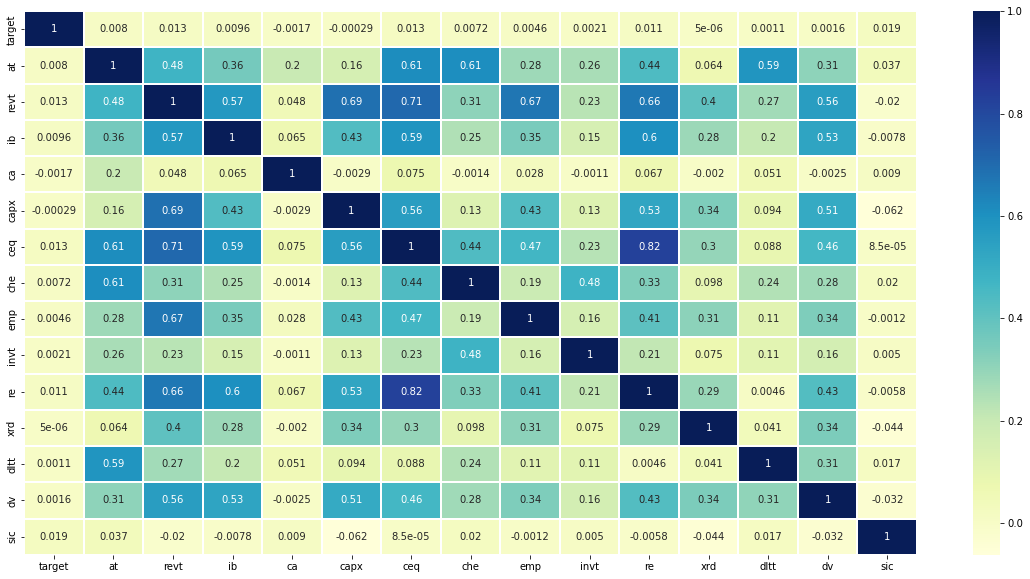

In [12]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(finance_features.corr(), cmap="YlGnBu", linewidths=0.1, annot=True, ax=ax)

In [13]:
# sns.pairplot(finance_features, hue='target', height=2.5)

In [14]:
model_comparison_cols = ['Model Name','Accuracy','Precision','Recall','F1 Score']

In [15]:
model_comparison_data = []

# Train Test Split of Data

In [16]:
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(finance_features, y, test_size=0.3,random_state=100)

In [17]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0.0: 156202, 1.0: 1305}

In [18]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0.0: 66947, 1.0: 556}

In [19]:
# SVM takes time to train, hence taking 5% sample of the training data to train the model
sampleN = int(len(X_train)*0.005)
print("Sample no.:", sampleN)

sample_X = X_train.sample(sampleN)
sample_y = sample_X['target']

sample_X.drop(columns=['target'], inplace=True)

Sample no.: 787


In [20]:
# Cleaning X_train and X_test for remaining models

X_train.drop(columns=['target'],inplace=True)
X_test.drop(columns=['target'],inplace=True)

## SVM

#### Training SVM Model

In [21]:
from sklearn import svm

In [22]:
clf = svm.SVC(kernel='linear')

In [23]:
# Taking too much time
# clf.fit(X_train, y_train)

clf.fit(sample_X,sample_y)

SVC(kernel='linear')

In [24]:
# import findspark
# findspark.init()

# import pyspark
# import random

# sc = pyspark.SparkContext(appName="svc")

# sc.parallelize(clf.fit(X_train,y_train))

# sc.stop()

# y_pred = clf.predict(X_test)

# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#### Predicting Target with SVM

In [25]:
y_pred_svm = clf.predict(X_test)

In [26]:
unique, counts = np.unique(y_pred_svm, return_counts=True)
dict(zip(unique, counts))

{0.0: 66938, 1.0: 565}

#### Metric Calculations for SVM

In [27]:
svm_accuracy = metrics.accuracy_score(y_test, y_pred_svm)
print("Accuracy:",svm_accuracy)

Accuracy: 0.9837784987333896


In [28]:
svm_precision = metrics.precision_score(y_test, y_pred_svm)
print("Precision:",svm_precision)

Precision: 0.023008849557522124


In [29]:
svm_recall = metrics.recall_score(y_test, y_pred_svm)
print("Recall:",svm_recall)

Recall: 0.023381294964028777


In [31]:
svm_f1 = metrics.f1_score(y_test, y_pred_svm, average='micro')
print("F1 Score:",svm_f1)

F1 Score: 0.9837784987333896


In [32]:
model_comparison_data.append(["Linear SVM",svm_accuracy, svm_precision, svm_recall, svm_f1])

In [33]:
cm_svm = metrics.confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[66395   552]
 [  543    13]]


<AxesSubplot:>

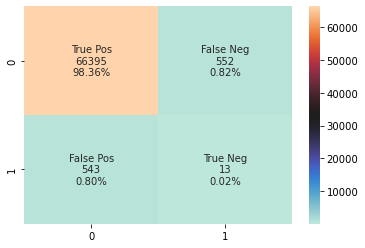

In [34]:
group_names = ['True Pos','False Neg','False Pos','True Neg']

group_counts = ["{0:0.0f}".format(value) for value in cm_svm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm_svm.flatten()/np.sum(cm_svm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm_svm, annot=labels, fmt='', cmap='icefire')

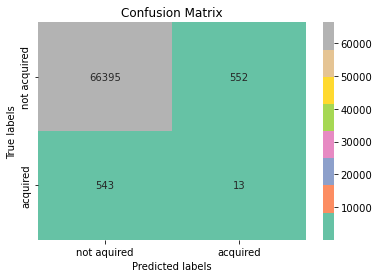

In [35]:
ax= plt.subplot()

# annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cm_svm, annot=True, fmt='g', ax=ax, cmap='Set2');  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['not aquired', 'acquired']); ax.yaxis.set_ticklabels(['not acquired', 'acquired']);

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logisticRegr = LogisticRegression()

#### Training Logistic Regression Model

In [38]:
logisticRegr.fit(X_train, y_train)

C:\Users\Sheetal\anaconda3\envs\cs549\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Predicting Target with Logistic Regression

In [39]:
y_pred_lr = logisticRegr.predict(X_test)

#### Metric Calculation for Logistic Regression

In [40]:
unique, counts = np.unique(y_pred_lr, return_counts=True)
dict(zip(unique, counts))

{0.0: 67492, 1.0: 11}

In [41]:
lrScore = logisticRegr.score(X_test, y_test)
print(lrScore)

0.9916003733167414


In [42]:
lr_accuracy = metrics.accuracy_score(y_test, y_pred_lr)
print("Accuracy:",lr_accuracy)

Accuracy: 0.9916003733167414


In [43]:
lr_precision = metrics.precision_score(y_test, y_pred_lr)
print("Precision:",lr_precision)

Precision: 0.0


In [44]:
lr_recall = metrics.recall_score(y_test, y_pred_lr)
print("Recall:",lr_recall)

Recall: 0.0


In [47]:
lr_f1 = metrics.f1_score(y_test, y_pred_lr, average='micro')
print("F1 Score:",lr_f1)

F1 Score: 0.9916003733167414


In [48]:
model_comparison_data.append(["Logistic Regression",lr_accuracy, lr_precision, lr_recall, lr_f1])

In [49]:
cm_lr= metrics.confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

[[66936    11]
 [  556     0]]


<AxesSubplot:>

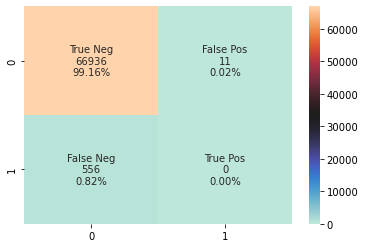

In [50]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in cm_lr.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm_lr.flatten()/np.sum(cm_lr)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm_lr, annot=labels, fmt='', cmap='icefire')

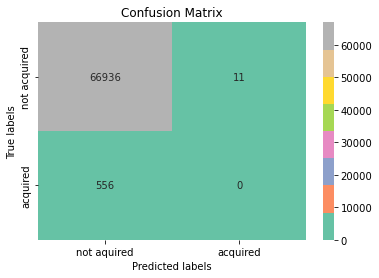

In [52]:
ax= plt.subplot()

# annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cm_lr, annot=True, fmt='g', ax=ax, cmap='Set2');  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['not aquired', 'acquired']); ax.yaxis.set_ticklabels(['not acquired', 'acquired']);

## Feed Forward NN 

In [53]:
import torch

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

Data Transformation

In [56]:
X_train = scaler.fit_transform(X_train)

In [57]:
X_test = scaler.transform(X_test)

In [58]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

Model

In [59]:
class BinaryClassification(torch.nn.Module):
    def __init__(self, input_dimension):
        super().__init__()
        self.linear = torch.nn.Linear(input_dimension,1)
        
    def forward(self, input_dimension):
        return self.linear(input_dimension)

In [60]:
_, input_dimension = X_train.shape

In [61]:
model = BinaryClassification(input_dimension)

In [62]:
def configure_loss_function():
    return torch.nn.BCEWithLogitsLoss()

def configure_optimizer(model):
    return torch.optim.Adam(model.parameters())


In [63]:
def full_gd(model, criterion, optimizer, X_train, y_train, n_epochs=2000):
    train_losses = np.zeros(n_epochs)
    test_losses = np.zeros(n_epochs)
    
    for it in range(n_epochs):
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        outputs_test = model(X_test)
        loss_test = criterion(outputs_test,y_test)
        
        train_losses[it] = loss.item()
        test_losses[it] = loss_test.item()
        
        if (it+1)%50 == 0:
            print(f'In this epoch {it+1}/{n_epochs}, training loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}')
        
        return train_losses, test_losses
    

In [64]:
X_train = torch.from_numpy(X_train.astype(np.float32))

In [65]:
X_test = torch.from_numpy(X_test.astype(np.float32))

In [66]:
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))

In [67]:
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

In [68]:
criterion = configure_loss_function()

In [69]:
optimizer = configure_optimizer(model)

In [70]:
train_losses, test_losses = full_gd(model, criterion, optimizer, X_train,y_train)

Training and Testing

In [71]:
with torch.no_grad():
    p_train = model(X_train)
    p_train = (p_train.numpy() > 0)
    
    train_acc = np.mean(y_train.numpy() == p_train)
    
    p_test = model(X_test)
    p_test = (p_test.numpy() > 0)
    
    test_acc = np.mean(y_test.numpy() == p_test)
    
print("Training: ",train_acc)
print("Testing: ", test_acc)

Training:  0.9791755287066607
Testing:  0.9801045879442395


Metric Calculations

In [72]:
nn_accuracy = metrics.accuracy_score(y_test, p_test)
print("Accuracy:",nn_accuracy)

Accuracy: 0.9801045879442395


In [73]:
nn_precision = metrics.precision_score(y_test, p_test)
print("Precision:",nn_precision)

Precision: 0.012391573729863693


In [74]:
nn_recall = metrics.recall_score(y_test, p_test)
print("Recall:",nn_recall)

Recall: 0.017985611510791366


In [76]:
nn_f1 = metrics.f1_score(y_test, p_test, average='micro')
print("F1 Score:",nn_f1)

F1 Score: 0.9801045879442395


In [77]:
model_comparison_data.append(["Feed Forward NN",nn_accuracy, nn_precision, nn_recall, nn_f1])

In [78]:
cm_nn= metrics.confusion_matrix(y_test, p_test)
print(cm_nn)

[[66150   797]
 [  546    10]]


<AxesSubplot:>

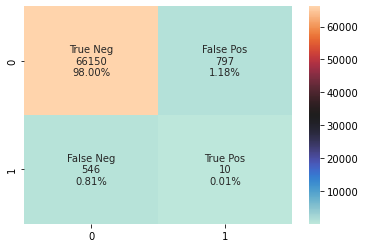

In [79]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in cm_nn.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm_nn.flatten()/np.sum(cm_nn)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm_nn, annot=labels, fmt='', cmap='icefire')

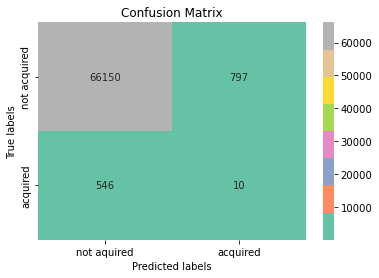

In [80]:
ax= plt.subplot()

# annot=True to annotate cells, ftm='g' to disable scientific notation
sns.heatmap(cm_nn, annot=True, fmt='g', ax=ax, cmap='Set2');  

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['not aquired', 'acquired']); ax.yaxis.set_ticklabels(['not acquired', 'acquired']);

## Model Comaparison

In [81]:
modelDf= pd.DataFrame(model_comparison_data,columns=model_comparison_cols)

In [82]:
modelDf

,Model Name,Accuracy,Precision,Recall,F1 Score
0,Linear SVM,0.983778,0.023009,0.023381,0.983778
1,Logistic Regression,0.991600,0.000000,0.000000,0.991600
2,Feed Forward NN,0.980105,0.012392,0.017986,0.980105
